<a href="https://colab.research.google.com/github/DGuilherme/TurbofanVibration/blob/master/TurbofanVibrationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise do Data Set Turbofans


*Imports needed*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for the FFT transformation
from scipy import pi
from scipy.fftpack import fft


## Analisys

*import dataset*

In [3]:
url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/train.txt'
data = pd.read_csv(url,header=None,delimiter=r"\s+")
data.columns = ["UnitNumber", "Cycle", "Setting1", "Setting2", "Setting3", "Measure1", "Measure2", "Measure3", "Measure4", "Measure5", "Measure6", "Measure7", "Measure8", "Measure9", "Measure10", "Measure11", "Measure12", "Measure13", "Measure14", "Measure15", "Measure16", "Measure17", "Measure18", "Measure19", "Measure20", "Measure21"]
# Dataset is now stored in a Pandas Dataframe
print(data)

       UnitNumber  Cycle  Setting1  ...  Measure19  Measure20  Measure21
0               1      1   10.0047  ...     100.00      28.58    17.1735
1               1      2    0.0015  ...     100.00      38.99    23.3619
2               1      3   34.9986  ...     100.00      14.83     8.8555
3               1      4   20.0031  ...     100.00      24.42    14.7832
4               1      5   42.0041  ...     100.00      10.99     6.4025
...           ...    ...       ...  ...        ...        ...        ...
45913         218    129   42.0066  ...     100.00      10.57     6.2985
45914         218    130   42.0029  ...     100.00      10.40     6.2741
45915         218    131   41.9999  ...     100.00      10.37     6.1978
45916         218    132   35.0007  ...     100.00      14.70     8.6761
45917         218    133   25.0071  ...      84.93      14.19     8.5120

[45918 rows x 26 columns]


In [4]:
print(data.describe())

         UnitNumber         Cycle  ...     Measure20     Measure21
count  45918.000000  45918.000000  ...  45918.000000  45918.000000
mean     109.396511    110.307396  ...     20.776822     12.466282
std       62.866193     68.420545  ...      9.903697      5.941954
min        1.000000      1.000000  ...     10.230000      6.126600
25%       54.000000     53.000000  ...     10.840000      6.504600
50%      110.000000    106.000000  ...     14.870000      8.925200
75%      164.000000    160.000000  ...     28.470000     17.084200
max      218.000000    357.000000  ...     39.330000     23.590500

[8 rows x 26 columns]


In [5]:
pd.DataFrame.corr(data)

,UnitNumber,Cycle,Setting1,Setting2,Setting3,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Measure16,Measure17,Measure18,Measure19,Measure20,Measure21
UnitNumber,1.000000,-0.004596,-0.001083,-0.001293,0.004181,0.000698,0.001035,0.001688,0.002068,0.001391,0.001445,0.001453,0.000832,0.003266,0.001048,0.001946,0.001474,0.000653,0.008970,-0.000422,-0.000205,0.001716,0.000774,0.000583,0.001395,0.001411
Cycle,-0.004596,1.000000,0.003473,0.005575,0.000274,-0.001072,0.005619,0.027155,0.038198,-0.002039,-0.001753,-0.003861,0.000546,0.023443,-0.006792,0.045787,-0.003694,0.001231,0.071030,0.033048,0.063947,0.027128,-0.000035,0.000537,-0.007669,-0.007735
Setting1,-0.001083,0.003473,1.000000,0.944070,-0.236526,-0.964898,-0.867841,-0.787827,-0.840494,-0.987410,-0.976517,-0.951664,-0.444496,-0.776828,-0.828269,-0.604965,-0.951256,-0.028466,-0.263886,0.461295,-0.840640,-0.790628,-0.443949,-0.028214,-0.962121,-0.962094
Setting2,-0.001293,0.005575,0.944070,1.000000,-0.384657,-0.886941,-0.811772,-0.761642,-0.837836,-0.934140,-0.929835,-0.919351,-0.441367,-0.754699,-0.885750,-0.623236,-0.919211,-0.066687,-0.356031,0.521131,-0.886204,-0.764962,-0.440888,-0.066521,-0.922367,-0.922311
Setting3,0.004181,0.000274,-0.236526,-0.384657,1.000000,0.148564,0.004370,-0.053529,0.026110,0.264139,0.231430,0.191948,-0.269789,-0.059550,0.076528,-0.140126,0.191662,-0.398303,-0.226750,0.163645,0.107336,-0.048482,-0.270175,-0.398198,0.193114,0.192972
Measure1,0.000698,-0.001072,-0.964898,-0.886941,0.148564,1.000000,0.944026,0.870890,0.898268,0.986637,0.986683,0.973444,0.572302,0.861949,0.828368,0.705847,0.973183,0.164004,0.354432,-0.543711,0.799580,0.873203,0.571773,0.163776,0.977990,0.977997
Measure2,0.001035,0.005619,-0.867841,-0.811772,0.004370,0.944026,1.000000,0.982283,0.981479,0.916066,0.944327,0.968934,0.810524,0.978669,0.907001,0.895765,0.969139,0.479953,0.625633,-0.778950,0.811421,0.983114,0.810141,0.479746,0.962672,0.962716
Measure3,0.001688,0.027155,-0.787827,-0.761642,-0.053529,0.870890,0.982283,1.000000,0.989703,0.842947,0.884787,0.929087,0.895789,0.997816,0.930105,0.960631,0.929554,0.620942,0.753071,-0.876608,0.809253,0.998687,0.895491,0.620743,0.917107,0.917162
Measure4,0.002068,0.038198,-0.840494,-0.837836,0.026110,0.898268,0.981479,0.989703,1.000000,0.884255,0.919707,0.956782,0.844425,0.987536,0.962092,0.936681,0.957183,0.544983,0.716351,-0.847379,0.861647,0.990403,0.844088,0.544782,0.946483,0.946517
Measure5,0.001391,-0.002039,-0.987410,-0.934140,0.264139,0.986637,0.916066,0.842947,0.884255,1.000000,0.996315,0.979802,0.524380,0.833187,0.844730,0.673428,0.979514,0.113651,0.331612,-0.526019,0.827026,0.845709,0.523828,0.113423,0.985746,0.985729


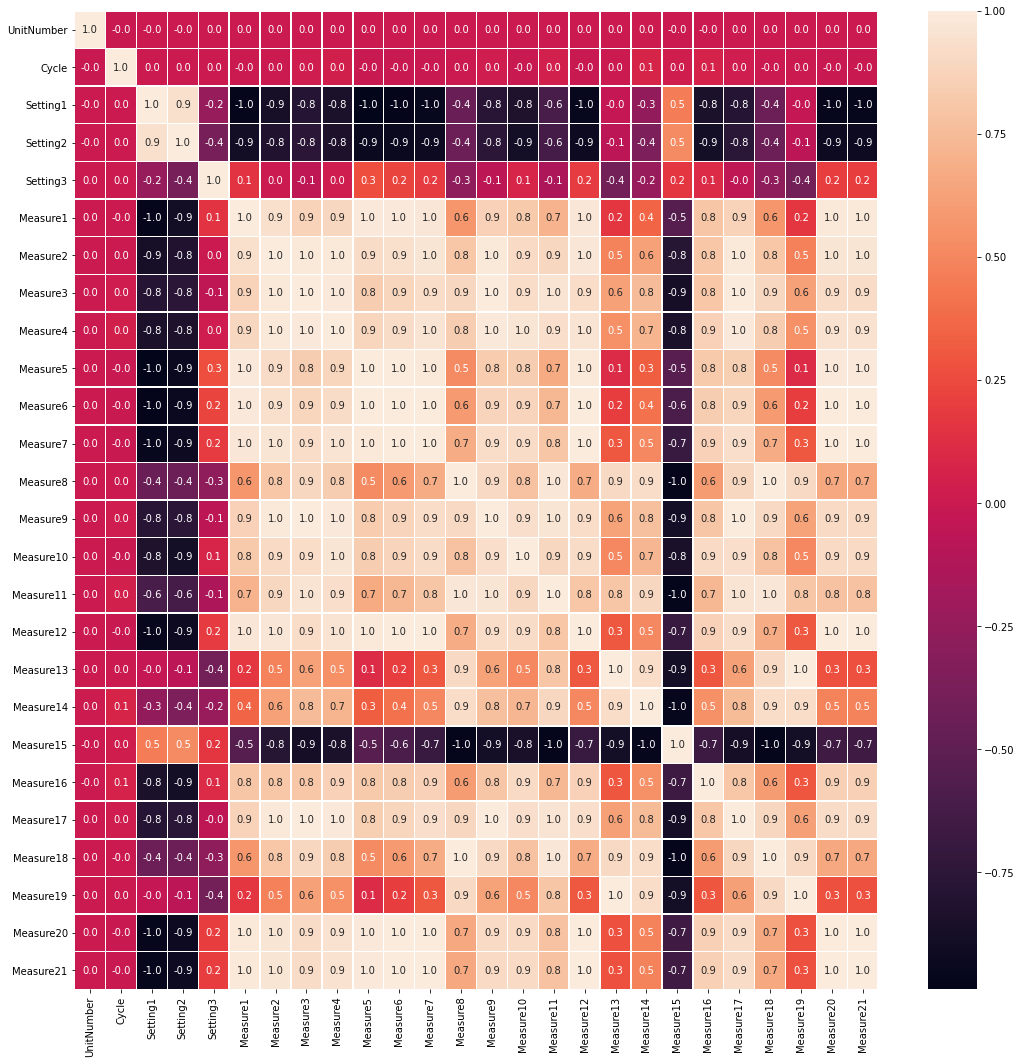

In [6]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

## FFT transformation

In [23]:
# how many records for the first machine


machine_1_count = np.sum(data['UnitNumber'] == 1)
print(machine_1_count)
# sample_rate is defined as number of samples taken per cycle
sample_rate = 1
# N is the size of the array
N = machine_1_count
# time
time = np.linspace(0, machine_1_count, N)

# Sampling data from machine 1
machine_1_data = data.iloc[0:machine_1_count]
print(machine_1_data)




223
     UnitNumber  Cycle  Setting1  ...  Measure19  Measure20  Measure21
0             1      1   10.0047  ...      100.0      28.58    17.1735
1             1      2    0.0015  ...      100.0      38.99    23.3619
2             1      3   34.9986  ...      100.0      14.83     8.8555
3             1      4   20.0031  ...      100.0      24.42    14.7832
4             1      5   42.0041  ...      100.0      10.99     6.4025
..          ...    ...       ...  ...        ...        ...        ...
218           1    219   35.0073  ...      100.0      14.82     8.7966
219           1    220   35.0027  ...      100.0      14.75     8.8290
220           1    221    0.0008  ...      100.0      38.67    23.0218
221           1    222   20.0003  ...      100.0      24.28    14.5645
222           1    223   34.9992  ...      100.0      14.70     8.6695

[223 rows x 26 columns]


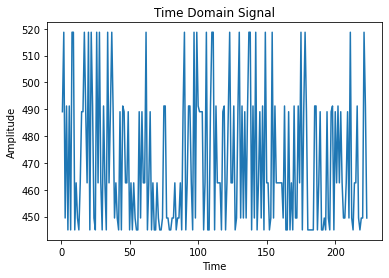

In [24]:
plt.plot (machine_1_data["Cycle"], machine_1_data["Measure1"])
plt.title ('Time Domain Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

### Applying FFT

In [ ]:
frequency = np.linspace (0.0, 512, int (N/2))

freq_data = fft(time_data)
y = 2/N * np.abs (freq_data [0:np.int (N/2)])